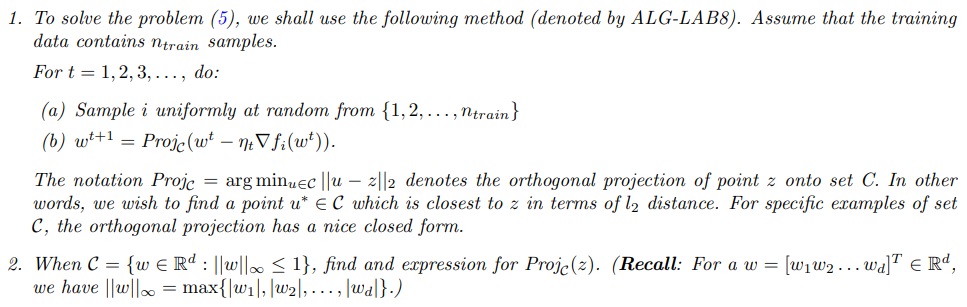


**To find the projection of a point  z onto the set
$C={w∈R^d :∣∣w∣∣_∞ ≤1}$, we need to find the point $u^∗ ∈ C$ that is closest to z in terms of the $l^2$ distance.**


**Given $z - [z_1,z_2....,z_d]^T$, we want to find $ u^* = [u_1,u_2,...,u_d]^T$ such that $ ||u^* - z||_2$  is minimized.**


**Since C is a bounded set, the projection onto C is the point in
C that minimizes the $l^2$ distance to $z$. This occurs when each component of $u^*$ is either equal to $z_i$ or equal to $-z_i$ (to ensure $∣∣w∣∣_∞ ≤1$) . In other words, for each component $u_i^*$ of $u^*$, we choose it to be $z_i$ or $-z_i$, depending on which one has a larger absolute value.**

**So, the expression for $Proj_C()$ is:**

 $Proj_C()$ = [$sign(z_1)$min{$|z_1|,1$},sign($z_2$)min{$|z_2|,1$}...,$sign(z_d)$min{$|d_1|,1$}$]^T$

**where $sign(z_1)$ is the sign of $z_i$ and min{$|z_i|$,1} ensures that the components of are bounded by 1.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_wine

# Load the wine data
wine = load_wine()
A = wine.data

# Number of classes
C = len(np.unique(wine.target))

normalized_A = np.zeros_like(A)
for i in range(A.shape[1]):

     normalized_A[:,i] = (A[:,i])/max(abs(A[:,i]))


In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
normalized_A = np.zeros_like(A)
for i in range(A.shape[1]):

     normalized_A[:,i] = (A[:,i])/max(abs(A[:,i]))

In [ ]:
n = wine.data.shape[0]  # Number of data points
d = wine.data.shape[1]  # Dimension of data points

# Create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
    y[i] = -1 if wine.target[i] != 1 else 1

# Create an index array
indexarr = np.arange(n)  # index array
np.random.shuffle(indexarr)  # shuffle the indices

# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_size = int(0.8*n)

train_data = normalized_A[indexarr[:train_size]]
train_label = y[indexarr[:train_size]]
test_data = normalized_A[indexarr[train_size:]]
test_label = y[indexarr[train_size:]]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)

Train data shape: (142, 13)
Train label shape: (142,)
Test data shape: (36, 13)
Test label shape: (36,)


In [ ]:
train_data

array([[0.85569791, 0.2637931 , 0.6996904 , ..., 0.56140351, 0.515     ,
        0.29464286],
       [0.84086312, 0.26206897, 0.68111455, ..., 0.67836257, 0.6575    ,
        0.5577381 ],
       [0.83749157, 0.27758621, 0.67801858, ..., 0.61988304, 0.74      ,
        0.20535714],
       ...,
       [0.81456507, 0.22931034, 0.7120743 , ..., 0.62573099, 0.8025    ,
        0.37202381],
       [0.9157114 , 0.44482759, 0.83281734, ..., 0.43274854, 0.45      ,
        0.44642857],
       [0.97033041, 0.32241379, 0.75851393, ..., 0.59649123, 0.895     ,
        0.76785714]])

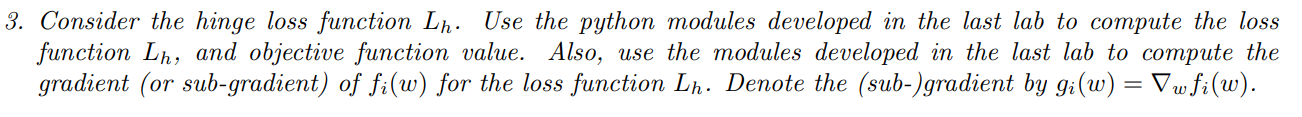

In [ ]:
def hinge_loss(x,y,w):

  return np.maximum(0,1-y*w@x)

def obj_func(X,y,w,lamda):
  loss = 0
  for i in range(X.shape[0]):
    margin = hinge_loss(X[i],y[i],w)
    loss += margin
  reg_term = (lamda/2)*np.linalg.norm(w)**2
  return loss + reg_term

def grad_loss(x, y, w, lambda_val,n):

    margin = 1 - y *( w@x)
    if margin >= 0:
        loss_gradient = -y*x
    else:
        loss_gradient = 0
    regularization_gradient = (1/n)*lambda_val * w
    gradient = regularization_gradient + loss_gradient/n
    return gradient

def predict(w,x):

  predict=[]

  for i in range(x.shape[0]):
    w1 = w @x[i]
    temp =np.sign(w1)
    if temp >= 0:
      predict.append(1)
    else:
      predict.append(-1)

  return predict

def calculate_accuracy(data,labels,model_w):
  predicted_value=predict(model_w,data)
  count_true=0
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy

**4. Define a module to compute the orthogonal projection onto the set C**

In [ ]:
def compute_orthogonal_projection(z):
    w = z / np.maximum(1, np.abs(z))
    return w

**5. Modify the code template given in the last lab to implement ALG-Lab8. Use the following code template**

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step*grad_loss(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(obj_func(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

**6. In OPT1, use num epochs = 500, step = $\frac{1}{t}$. For each $λ ∈ [{10^{−3}, 10^{−2}, 0.1, 1,10}]$, perform the following tasks:**

• Plot the objective function value in every epoch. Use different colors for different λ values.

• Plot the test set accuracy in every epoch. Use different colors for different λ values.

• Plot the train set accuracy in every epoch. Use different colors for different λ values.

• Tabulate the final test set accuracy and train set accuracy for each λ value.

• Explain your observations.

In [ ]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst = []
test_acc_lst = []
train_acc_lst = []

for lam in lamda:
  #val = OPT1(train_data,train_label,lam,num_epoch)
  obj_func_lst.append(OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst.append(OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst.append(OPT1(train_data,train_label,lam,num_epoch)[3])

##**Plot of objective function value in every epoch.**



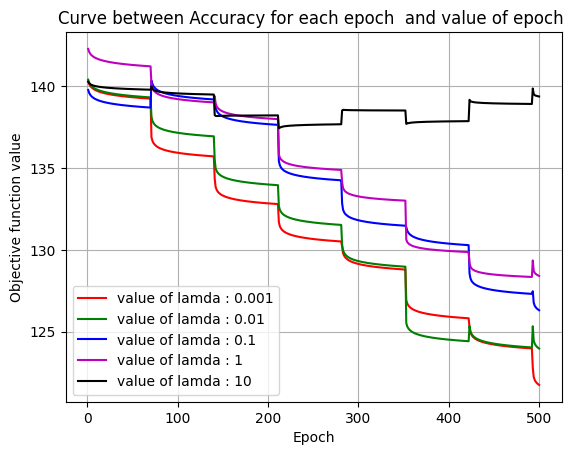

In [ ]:
plt.plot([i for i in range(1,501)],obj_func_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


#**OBSERVATION**

Here it can be seen that lowering the lamda value leads to a lower objective value i.e lamda = 0.001 achieves the lowest objective value.

##**Plot of test set accuracy in every epoch**

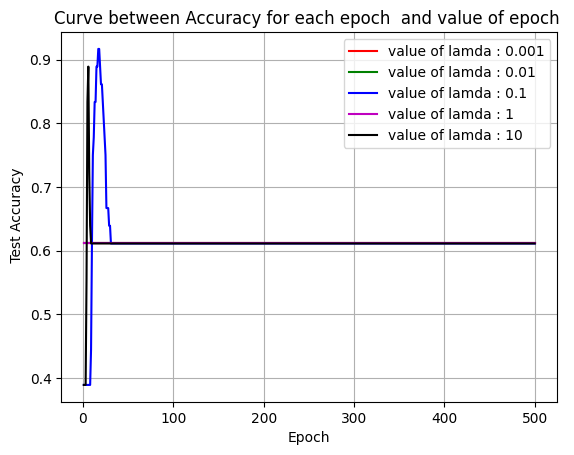

In [ ]:
plt.plot([i for i in range(1,501)],test_acc_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


#**OBSERVATION**
Here it can be seen that only for lamda = 0.1,10, the accuracy fluctuates and eventually becomes 0.61

##**Plot the train set accuracy in every epoch.**

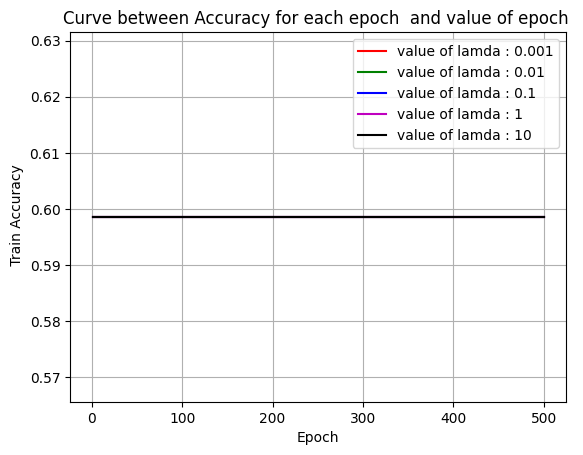

In [ ]:
plt.plot([i for i in range(1,501)],train_acc_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
The train accuracy remains constant ( 0.61)

##**Tabulate the final test set accuracy and train set accuracy for each λ value**

In [ ]:
from prettytable import PrettyTable
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',train_acc_lst[0][-1],test_acc_lst[0][-1]])
table.add_row(['0.01',train_acc_lst[1][-1],test_acc_lst[1][-1]])
table.add_row(['0.1',train_acc_lst[2][-1],test_acc_lst[2][-1]])
table.add_row(['1',train_acc_lst[3][-1],test_acc_lst[3][-1]])
table.add_row(['10',train_acc_lst[4][-1],test_acc_lst[4][-1]])
print(table)


+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5985915492957746 | 0.6111111111111112 |
|      0.01     | 0.5985915492957746 | 0.6111111111111112 |
|      0.1      | 0.5985915492957746 | 0.6111111111111112 |
|       1       | 0.5985915492957746 | 0.6111111111111112 |
|       10      | 0.5985915492957746 | 0.6111111111111112 |
+---------------+--------------------+--------------------+


#**Logistic**
##**$L_l(y_i
, w^T x_i) = log(1 + exp(−y_iw
^T x_i))$**

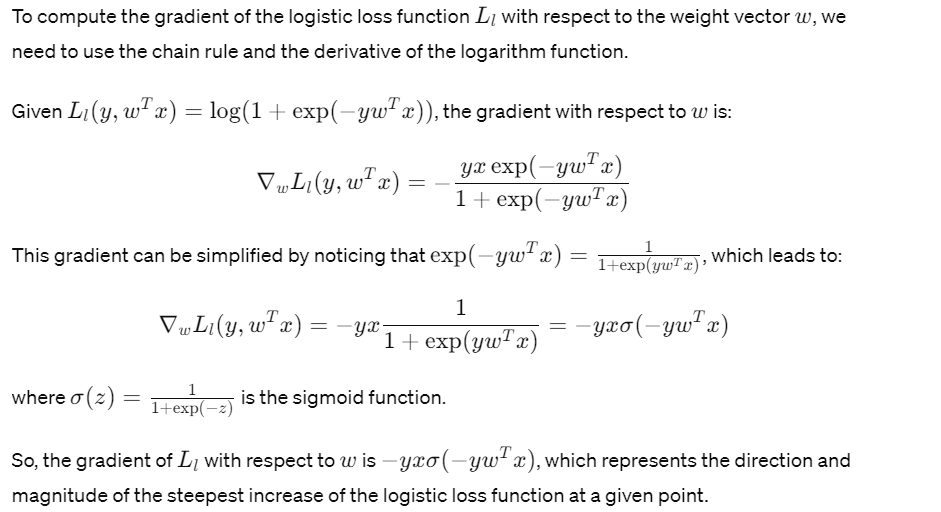

In [ ]:
def logistic_loss(x,y,w):

  return np.log(1+np.exp(-y * w @ x))

def logistic_obj_func(x,y,w,lamda):
    n=x.shape[0]
    loss=0
    for i in range(n):
      loss=loss+logistic_loss(x[i],y[i],w)
    reg_term=1/2*lamda*((np.linalg.norm(w))**2)
    obj=reg_term+loss/n
    return obj
def logistic_grad(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  loss_term=(1/n)*y*x*(1/(1+np.exp(y*(w@x))))
  return reg_term-loss_term

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step*logistic_grad(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(logistic_obj_func(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [ ]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst1 = []
test_acc_lst1 = []
train_acc_lst1 = []

for lam in lamda:
  obj_func_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[3])

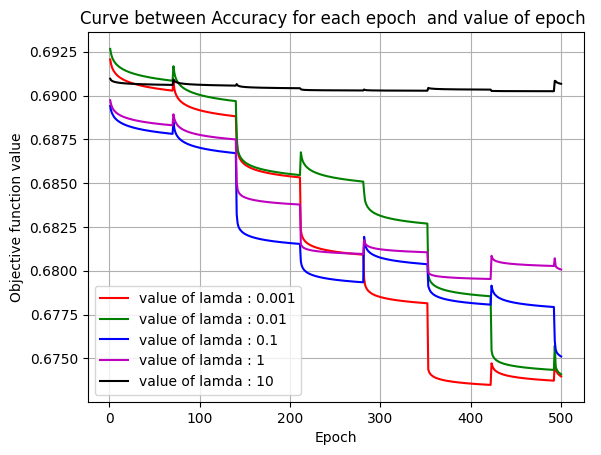

In [ ]:
plt.plot([i for i in range(1,501)],obj_func_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
Here it can be seen that lowering the lamda value leads to a lower objective value.

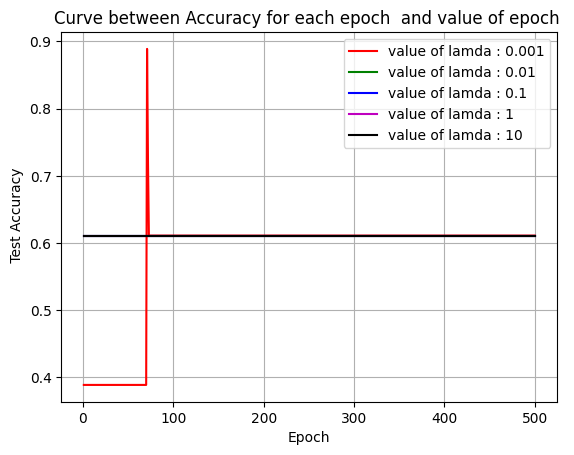

In [ ]:
plt.plot([i for i in range(1,501)],test_acc_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
Here it can be seen that highest accuracy is achieved by using lamda = 0.001 but it eventually becomes constant equal to all the other accuracy values for respective lamdas

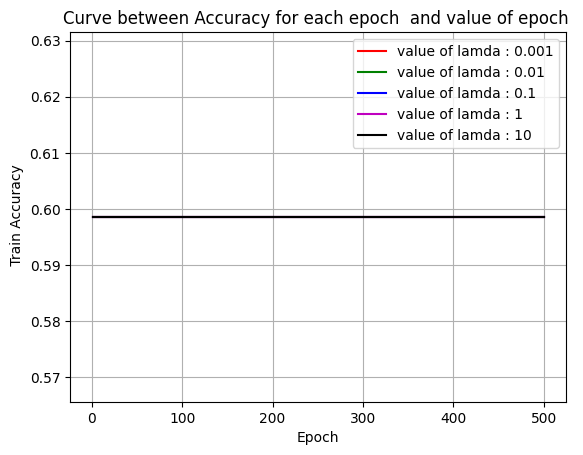

In [ ]:
plt.plot([i for i in range(1,501)],train_acc_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
table1 =PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table1.add_row(['0.001',train_acc_lst1[0][-1],test_acc_lst1[0][-1]])
table1.add_row(['0.01',train_acc_lst1[1][-1],test_acc_lst1[1][-1]])
table1.add_row(['0.1',train_acc_lst1[2][-1],test_acc_lst1[2][-1]])
table1.add_row(['1',train_acc_lst1[3][-1],test_acc_lst1[3][-1]])
table1.add_row(['10',train_acc_lst1[4][-1],test_acc_lst1[4][-1]])
print(table1)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5985915492957746 | 0.6111111111111112 |
|      0.01     | 0.5985915492957746 | 0.6111111111111112 |
|      0.1      | 0.5985915492957746 | 0.6111111111111112 |
|       1       | 0.5985915492957746 | 0.6111111111111112 |
|       10      | 0.5985915492957746 | 0.6111111111111112 |
+---------------+--------------------+--------------------+


#**OBSERVATION**

1. Here it can be seen that lowering the lamda value leads to a lower objective value.
2. The accuracy of the test dataset seems to be highest at the lowest epoch value i.e 0.001 but eventually after 500 epoch values it comes down to 0.61 equal to  every other accuracy.

# Squared Hinge
##**$L_{sh}(y_i, w^T x_i)$ = (max{$0, 1 − y_iw^T x_i$}$)^2$**


In [ ]:
def sq_hinge(x,y,w):
  return np.maximum(0,1- y*(w@x))**2

def obj_sq_hinge(X,y,w,lamda):
  n = X.shape[0]
  loss = 0
  for i in range(n):
    loss = loss + sq_hinge(X[i],y[i],w)

  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj = reg_term + loss/n
  return obj

def squared_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  z=y*(w@x)
  grad=0

  if (1-z)>0:
    grad=-2*(1-z)*y*x
  gradient=reg_term+grad/n
  return gradient


In [ ]:
def sq_hinge_OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step* squared_gradient(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(obj_sq_hinge(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [ ]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst2 = []
test_acc_lst2 = []
train_acc_lst2 = []

for lam in lamda:
  obj_func_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[3])

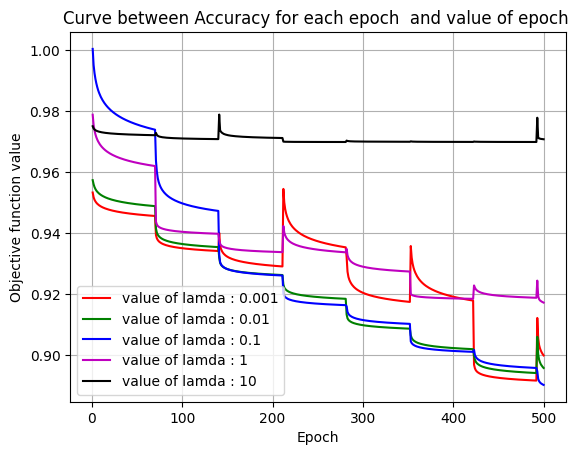

In [ ]:
plt.plot([i for i in range(1,501)],obj_func_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

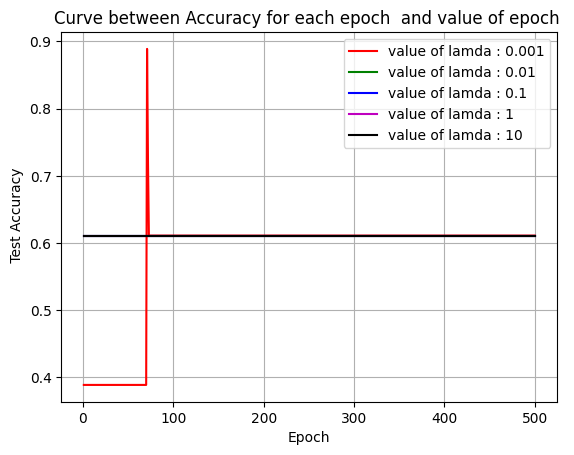

In [ ]:
plt.plot([i for i in range(1,501)],test_acc_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

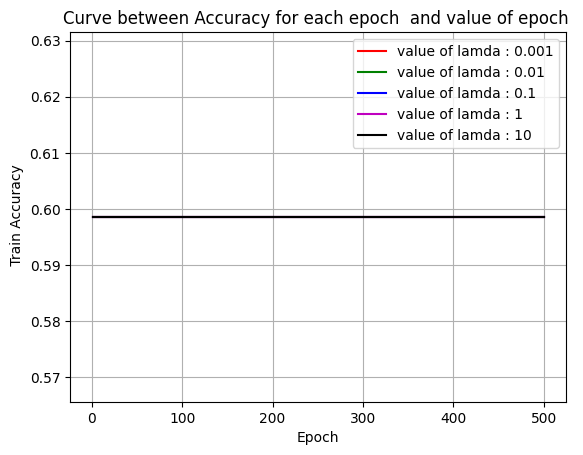

In [ ]:
plt.plot([i for i in range(1,501)],train_acc_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
table2 =PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table2.add_row(['0.001',train_acc_lst2[0][-1],test_acc_lst2[0][-1]])
table2.add_row(['0.01',train_acc_lst2[1][-1],test_acc_lst2[1][-1]])
table2.add_row(['0.1',train_acc_lst2[2][-1],test_acc_lst2[2][-1]])
table2.add_row(['1',train_acc_lst2[3][-1],test_acc_lst2[3][-1]])
table2.add_row(['10',train_acc_lst2[4][-1],test_acc_lst2[4][-1]])
print(table2)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5985915492957746 | 0.6111111111111112 |
|      0.01     | 0.5985915492957746 | 0.6111111111111112 |
|      0.1      | 0.5985915492957746 | 0.6111111111111112 |
|       1       | 0.5985915492957746 | 0.6111111111111112 |
|       10      | 0.5985915492957746 | 0.6111111111111112 |
+---------------+--------------------+--------------------+


#**OBSERVATION**

1. Here it can be seen that lowering the lamda value leads to a lower objective value.
2. The accuracy of the test dataset seems to be highest at the lowest epoch value i.e 0.001 but eventually after 500 epoch values it comes down to 0.61 equal to  every other accuracy.
3. For the train accuracy it remains constant to 0.59 for every lamdas at each epoch